In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

src = cv2.imread('/content/drive/MyDrive/sample_data/bloodcells_dataset/basophil/BA_102750.jpg')
img = src.copy()
gray = img[:, :, 0]
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 3) # Morphological open operation

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=9)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)


# Marker labelling
ret, markers1 = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers1+10

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers3 = cv2.watershed(img,markers)
img[markers3 == -1] = [255,255,255]

plt.show()
gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret1,th1 = cv2.threshold(gr,127,255,0)


imagem = th1
imagem = cv2.bitwise_not(imagem)


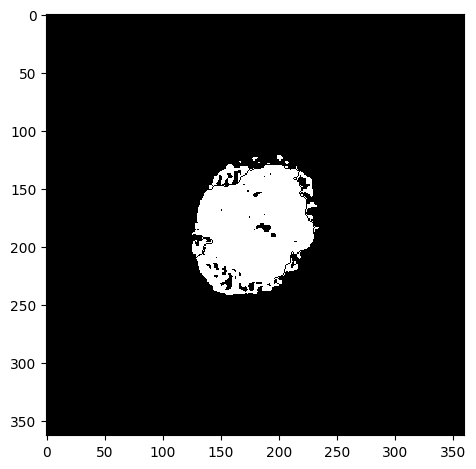

In [3]:
import skimage
skimage.io.imshow(imagem)